In [24]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/housing (1).csv')

# Display basic information
print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
# Display descriptive statistics
df.describe()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Descriptive Statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


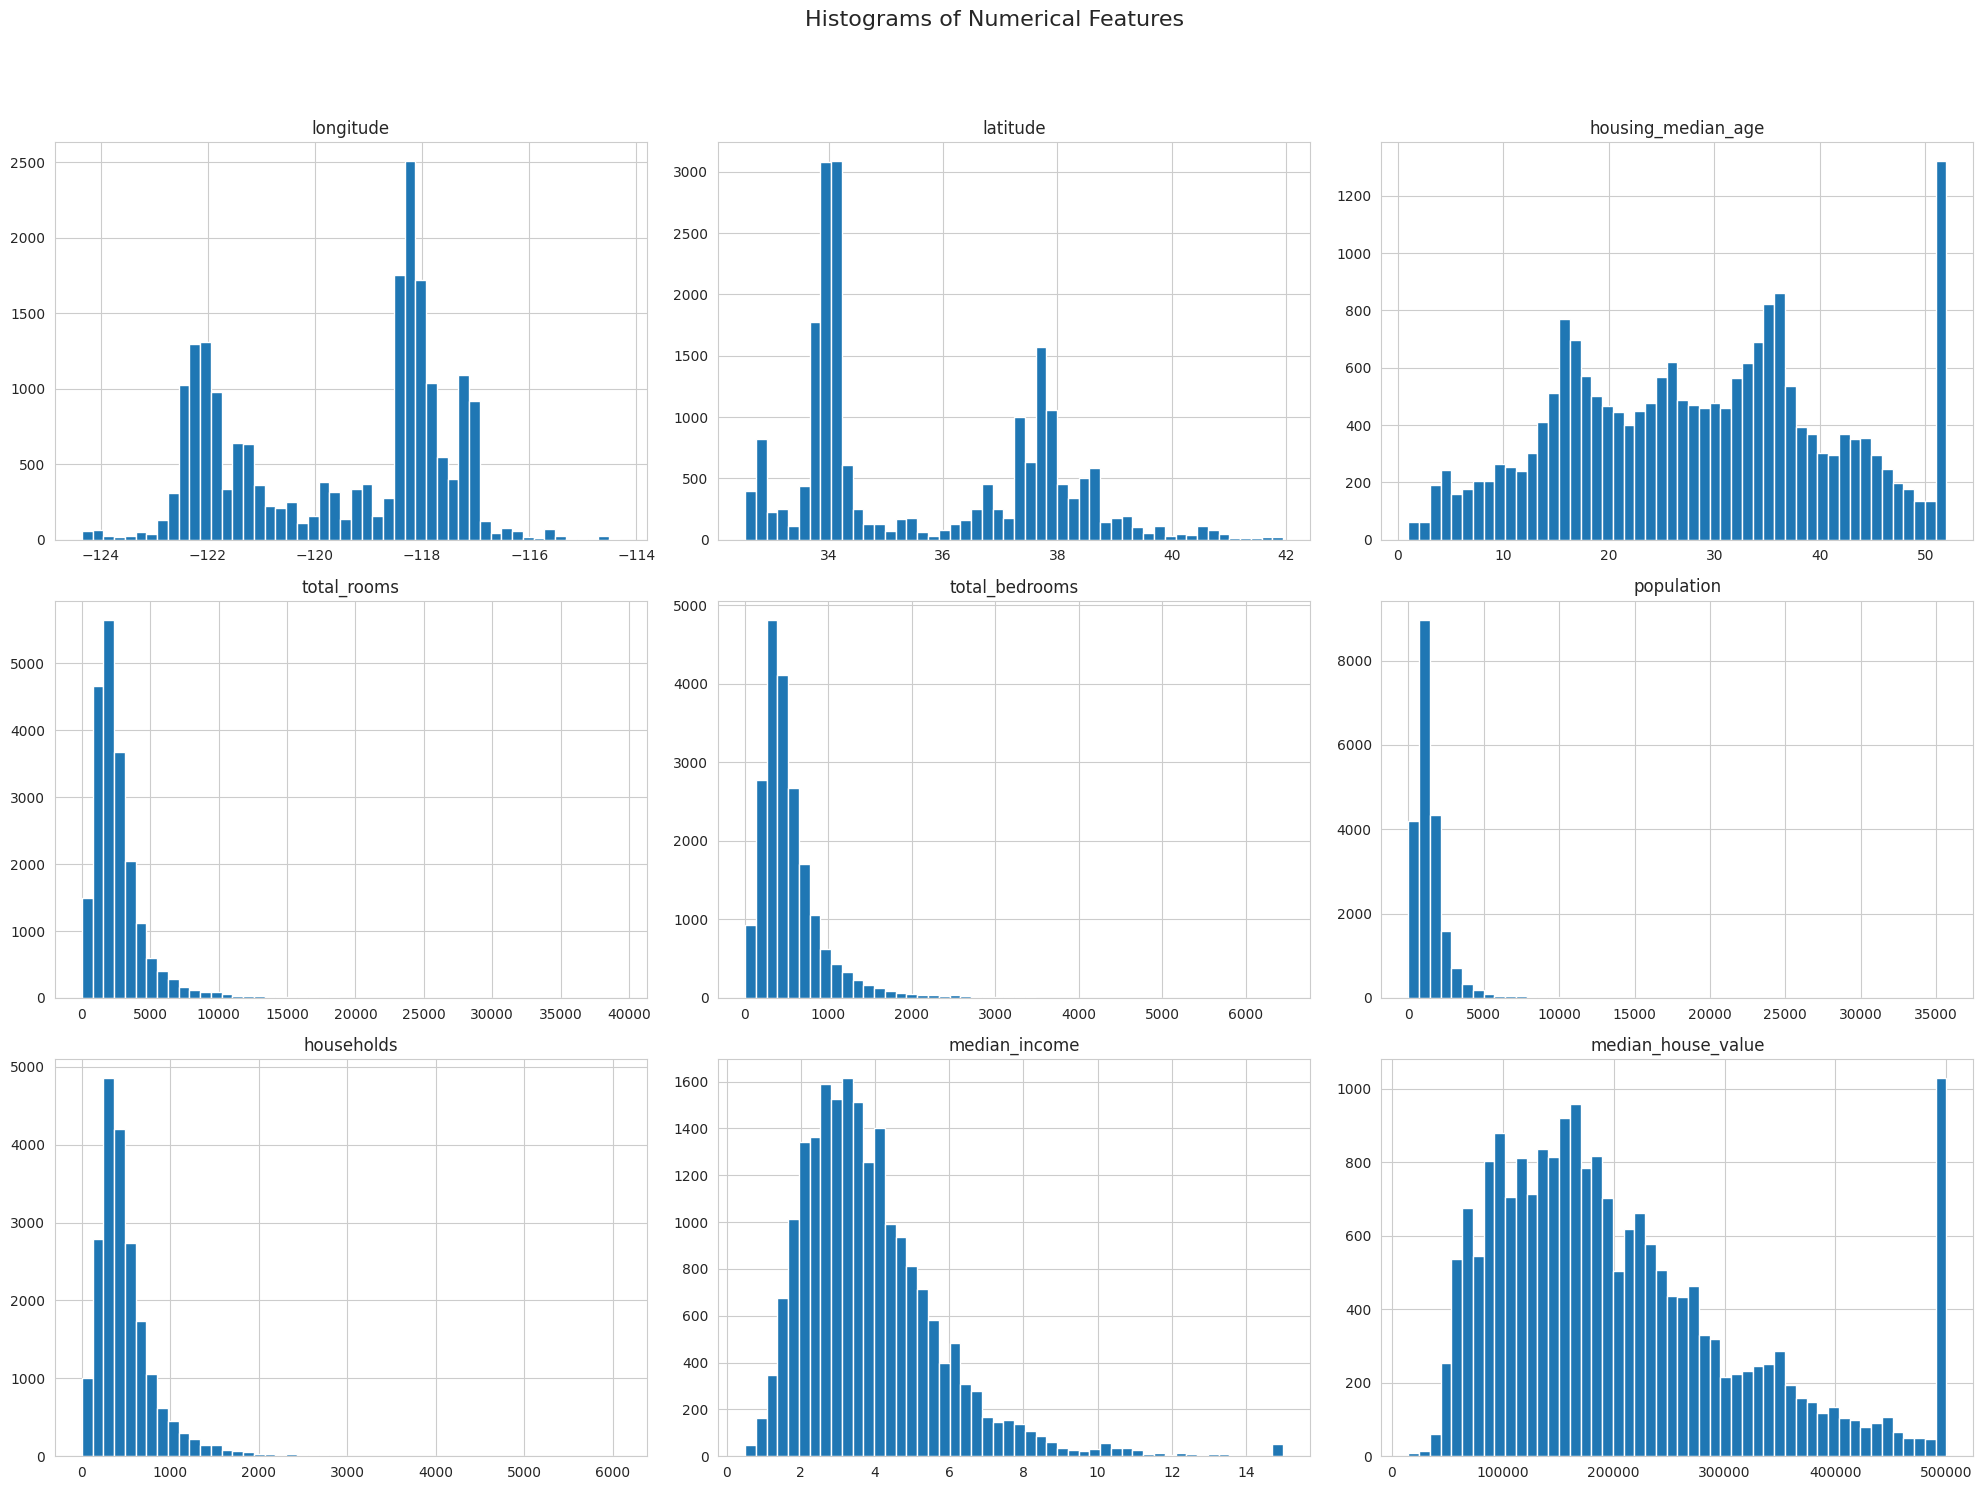

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot histograms for all numerical features
df.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


**Reasoning**:
The subtask requires demonstrating both random and stratified test set creation. I will start by importing necessary libraries and then generate the random test set.



In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

# 2. Create a random test set
train_set_random, test_set_random = train_test_split(df, test_size=0.2, random_state=42)

print(f"Random Test Set shape: {test_set_random.shape}")
print(f"Random Train Set shape: {train_set_random.shape}")

Random Test Set shape: (4128, 10)
Random Train Set shape: (16512, 10)


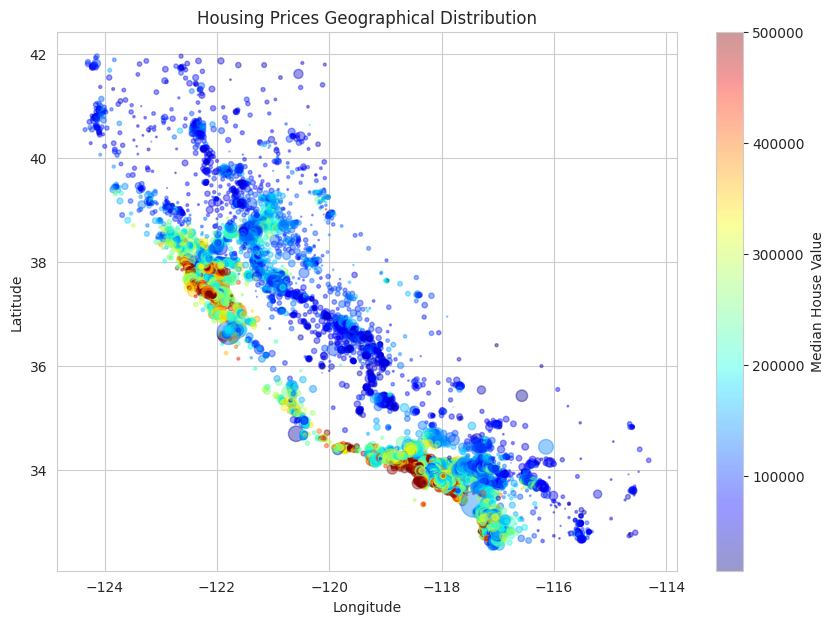

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(df["longitude"], df["latitude"],
            alpha=0.4,
            s=df["population"]/100,  # Adjusting size scale for better visualization
            c=df["median_house_value"],
            cmap=plt.get_cmap("jet"))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Prices Geographical Distribution")
plt.colorbar(label="Median House Value")
plt.show()


In [8]:
corr_matrix = df.corr(numeric_only=True)
print("Correlation Matrix Calculated.")

Correlation Matrix Calculated.


Correlations with median_house_value:
median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Strongest correlating feature with median_house_value: median_income (Correlation: 0.688)


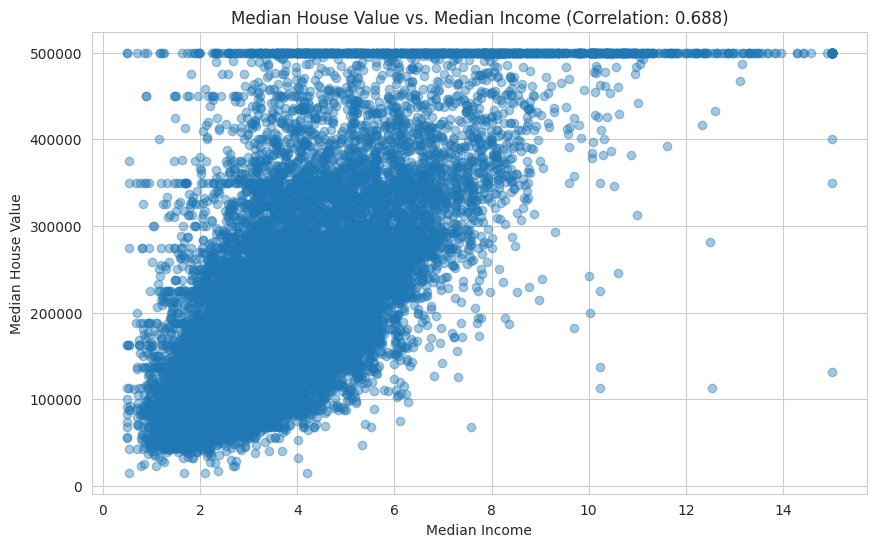

In [9]:
 correlations_with_housing_value = corr_matrix["median_house_value"].sort_values(ascending=False)

print("Correlations with median_house_value:")
print(correlations_with_housing_value)

# Identify the strongest correlating feature (excluding median_house_value itself)
# We'll take the absolute value to find the strongest correlation, whether positive or negative
strongest_corr_feature_name = correlations_with_housing_value.drop('median_house_value').abs().idxmax()
strongest_corr_value = correlations_with_housing_value[strongest_corr_feature_name]

print(f"\nStrongest correlating feature with median_house_value: {strongest_corr_feature_name} (Correlation: {strongest_corr_value:.3f})")

# Plot the scatter graph for the strongest correlating feature
plt.figure(figsize=(10, 6))
plt.scatter(df[strongest_corr_feature_name], df["median_house_value"], alpha=0.4)
plt.xlabel(strongest_corr_feature_name.replace('_', ' ').title())
plt.ylabel("Median House Value")
plt.title(f"Median House Value vs. {strongest_corr_feature_name.replace('_', ' ').title()} (Correlation: {strongest_corr_value:.3f})")
plt.grid(True)
plt.show()

## Feature Engineering: Combine Features

### Subtask:
Identify and list features that could potentially be combined to create new features to improve correlation with `housing_median_price`. Create these new combined features and re-evaluate their correlation, plotting a graph to demonstrate any improvement.


**Reasoning**:
First, I will create the new features (`rooms_per_household`, `bedrooms_per_room`, `population_per_household`) by combining existing columns in the DataFrame `df`.



In [10]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

print("New features 'rooms_per_household', 'bedrooms_per_room', and 'population_per_household' created.")

New features 'rooms_per_household', 'bedrooms_per_room', and 'population_per_household' created.


Updated Correlations with median_house_value:
median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Strongest correlating feature with median_house_value (after feature engineering): median_income (Correlation: 0.688)


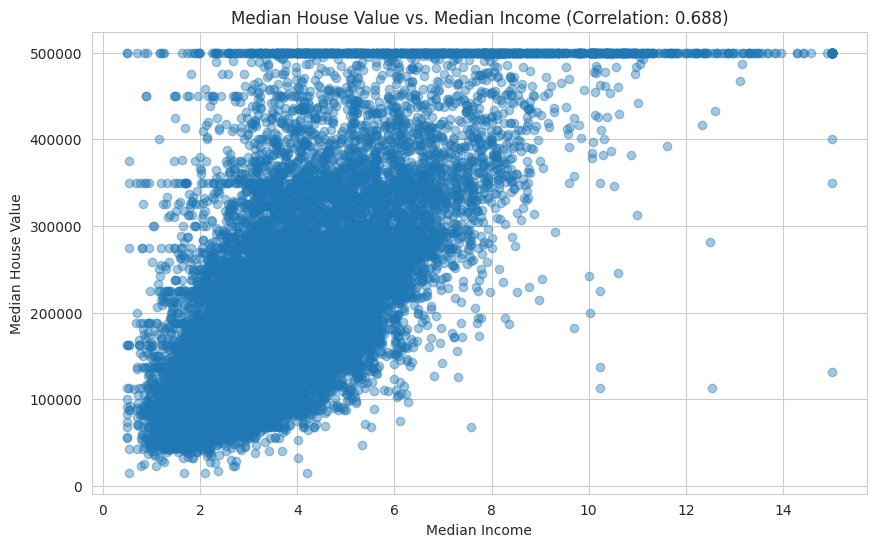

In [11]:
corr_matrix_updated = df.corr(numeric_only=True)

correlations_with_housing_value_updated = corr_matrix_updated["median_house_value"].sort_values(ascending=False)

print("Updated Correlations with median_house_value:")
print(correlations_with_housing_value_updated)

# Identify the strongest correlating feature (excluding median_house_value itself)
strongest_corr_feature_name_updated = correlations_with_housing_value_updated.drop('median_house_value').abs().idxmax()
strongest_corr_value_updated = correlations_with_housing_value_updated[strongest_corr_feature_name_updated]

print(f"\nStrongest correlating feature with median_house_value (after feature engineering): {strongest_corr_feature_name_updated} (Correlation: {strongest_corr_value_updated:.3f})")

# Plot the scatter graph for the strongest correlating feature
plt.figure(figsize=(10, 6))
plt.scatter(df[strongest_corr_feature_name_updated], df["median_house_value"], alpha=0.4)
plt.xlabel(strongest_corr_feature_name_updated.replace('_', ' ').title())
plt.ylabel("Median House Value")
plt.title(f"Median House Value vs. {strongest_corr_feature_name_updated.replace('_', ' ').title()} (Correlation: {strongest_corr_value_updated:.3f})")
plt.grid(True)
plt.show()

In [12]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64


In [13]:
median_total_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

print(f"Missing values in 'total_bedrooms' filled with median: {median_total_bedrooms}")

Missing values in 'total_bedrooms' filled with median: 435.0


/tmp/ipython-input-1256987847.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


In [14]:
median_total_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_total_bedrooms)

# Recalculate 'bedrooms_per_room' after 'total_bedrooms' has been imputed
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

print(f"Missing values in 'total_bedrooms' filled with median: {median_total_bedrooms}")

# Verify that all missing values are now handled
print("\nMissing values after cleaning (total_bedrooms and bedrooms_per_room re-calculated):")
print(df[['total_bedrooms', 'bedrooms_per_room']].isnull().sum())

Missing values in 'total_bedrooms' filled with median: 435.0

Missing values after cleaning (total_bedrooms and bedrooms_per_room re-calculated):
total_bedrooms       0
bedrooms_per_room    0
dtype: int64


In [15]:
categorical_features = df.select_dtypes(include='object')

print("Categorical features identified:")
for col in categorical_features.columns:
    print(f"\nFeature: {col}")
    print(df[col].value_counts())


Categorical features identified:

Feature: ocean_proximity
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [16]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the 'ocean_proximity' column
# Reshape df['ocean_proximity'] to a 2D array as required by fit_transform
ocean_proximity_encoded = cat_encoder.fit_transform(df[['ocean_proximity']])

# Get feature names for the new columns
ocean_proximity_cols = cat_encoder.get_feature_names_out(['ocean_proximity'])

# Convert the encoded array to a DataFrame
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=ocean_proximity_cols, index=df.index)

print("Categorical feature 'ocean_proximity' has been One-Hot encoded.")

Categorical feature 'ocean_proximity' has been One-Hot encoded.


In [17]:
df = pd.concat([df.drop('ocean_proximity', axis=1), ocean_proximity_df], axis=1)

print("DataFrame after One-Hot Encoding and dropping original 'ocean_proximity' column:")
print(df.head())

print("\nDataFrame Info after One-Hot Encoding:")
df.info()

DataFrame after One-Hot Encoding and dropping original 'ocean_proximity' column:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  income_cat  \
0       322.0       126.0         8.3252            452600.0         5.0   
1      2401.0      1138.0         8.3014            358500.0         5.0   
2       496.0       177.0         7.2574            352100.0         5.0   
3       558.0       219.0         5.6431            341300.0         4.0   
4       565.0       259.0         3.8462            342200.0         3.0   

   rooms_pe

In [18]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 1. Prepare Data: Reload the original dataset
housing_raw = pd.read_csv('/content/housing (1).csv')

# Separate features (X) and target (y)
X = housing_raw.drop('median_house_value', axis=1) # Features
y = housing_raw['median_house_value'] # Target variable

# Identify numerical and categorical features
num_attribs = list(X.select_dtypes(include=[np.number]).columns)
cat_attribs = ['ocean_proximity']

print("Data reloaded and separated.")
print(f"Numerical attributes: {num_attribs}")
print(f"Categorical attributes: {cat_attribs}")

Data reloaded and separated.
Numerical attributes: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical attributes: ['ocean_proximity']


In [19]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        # Define indices for columns within the numerical part of the DataFrame
        # These indices are based on the 'num_attribs' list
        self.total_rooms_ix = num_attribs.index('total_rooms')
        self.population_ix = num_attribs.index('population')
        self.households_ix = num_attribs.index('households')
        self.total_bedrooms_ix = num_attribs.index('total_bedrooms')

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        # Ensure X is a numpy array for indexed access
        X = np.asarray(X)

        rooms_per_household = X[:, self.total_rooms_ix] / X[:, self.households_ix]
        population_per_household = X[:, self.population_ix] / X[:, self.households_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, self.total_bedrooms_ix] / X[:, self.total_rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

print("Custom transformer 'CombinedAttributesAdder' defined.")

Custom transformer 'CombinedAttributesAdder' defined.


In [20]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=True)),
    ('std_scaler', StandardScaler()),
])

print("Numerical pipeline 'num_pipeline' created.")

Numerical pipeline 'num_pipeline' created.


In [21]:
cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

print("Categorical pipeline 'cat_pipeline' created.")

Categorical pipeline 'cat_pipeline' created.


In [22]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

print("Full preprocessing pipeline 'full_pipeline' created.")

Full preprocessing pipeline 'full_pipeline' created.


In [23]:
X_prepared = full_pipeline.fit_transform(X)

print("Features transformed using the full pipeline.")
print(f"Shape of X_prepared: {X_prepared.shape}")

Features transformed using the full pipeline.
Shape of X_prepared: (20640, 16)
